# E4 - Seaborn

### What are the most popular stations in the city?¶
### What are the busiest months and is there a weather component at play?
### What are the most popular trips between stations?
### Are the existing stations evenly distributed?

The first question - “What are the most popular stations in the city?” - has an easy answer - we simply need a list of the 10 or 20 most popular start stations in the city. As this variable is a categorical one, **a bar chart** would suit our purposes best. A bar chart is one of the most common forms of visualizations because it’s very straightforward to interpret from anyone regardless of their background.

Onto the second question - regarding when the most trips are taken and how this is connected to weather - we’d need a yearly overview of the trips month by month. Time series are best plotted on **a line chart**, hence we could plot the sum of the bike trips for each month as one line and combine it with the average temperature monthly as a second line on the plot. This will also show us whether there’s a relationship between temperature and bike usage. This is important because right now, the business strategy development isn’t clear whether the demand problem is a seasonal one or not.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns
# Set the theme style and palette for all the visualizations
sns.set_style('darkgrid')
sns.set_palette('PuRd_r')

In [5]:
df = pd.read_csv('NewYork_data.csv', index_col = 0)

In [6]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

## Types of seaborn visualizations

### Bar plot

In [9]:
df['value'] = 1

In [10]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [11]:
df_t

,start_station_name,value
0,11 St & Washington St,27313
1,12 St & Sinatra Dr N,22295
2,14 St Ferry - 14 St & Shipyard Ln,28207
3,2 St HBLR - 2 St & Marshall St,588
4,4 St & Grand St,15474
...,...,...
82,Van Vorst Park,16786
83,Warren St,22306
84,Washington St,25064
85,Willow Ave & 12 St,12945


In [12]:
top20 = df_t.nlargest(20, 'value')

In [13]:
top20

,start_station_name,value
40,Grove St PATH,63481
78,South Waterfront Walkway - Sinatra Dr & 1 St,57939
46,Hoboken Terminal - Hudson St & Hudson Pl,50857
47,Hoboken Terminal - River St & Hudson Pl,47467
72,Newport Pkwy,37474
41,Hamilton Park,33997
71,Newport PATH,33197
64,Marin Light Rail,31018
45,Hoboken Ave at Monmouth St,30542
2,14 St Ferry - 14 St & Shipyard Ln,28207


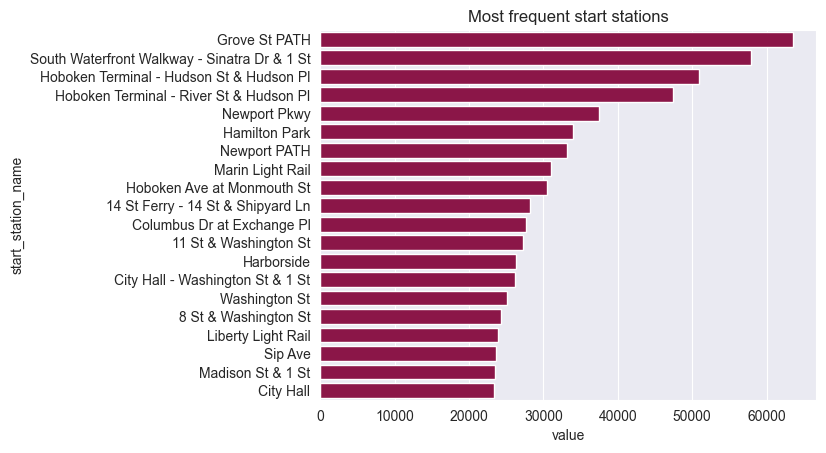

In [14]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

/var/folders/d9/m6pz848x453dch7l819567br0000gn/T/ipykernel_38518/1963600691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("PuRd_r"))


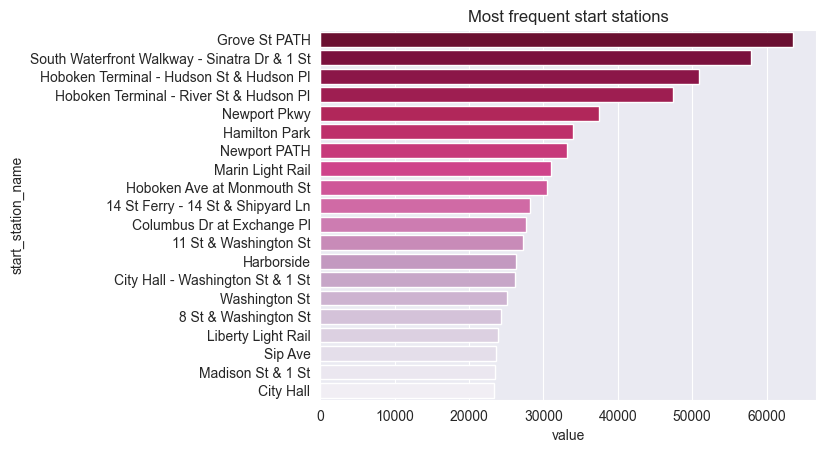

In [15]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("PuRd_r"))
plt.title("Most frequent start stations")
plt.show()

#### Yes, using a color gradient to represent the top 20 stations from dark to light shades is a good choice because it effectively conveys the ranking and hierarchy of the stations.

### Line plot

In [18]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [19]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [20]:
df_group.head()

,date,ride_id
0,2021-06-01,2024
1,2021-06-02,1956
2,2021-06-03,1285
3,2021-06-04,1693
4,2021-06-05,2771


In [21]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of June 1st is", df[df['date'] == '2021-01-01'].shape) # Check 
print("Shape of June 2nd is", df[df['date'] == '2021-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          1388898
left_only           0
right_only          0
Name: count, dtype: int64
Shape of June 1st is (0, 19)
Shape of June 2nd is (0, 19)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')


In [22]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')

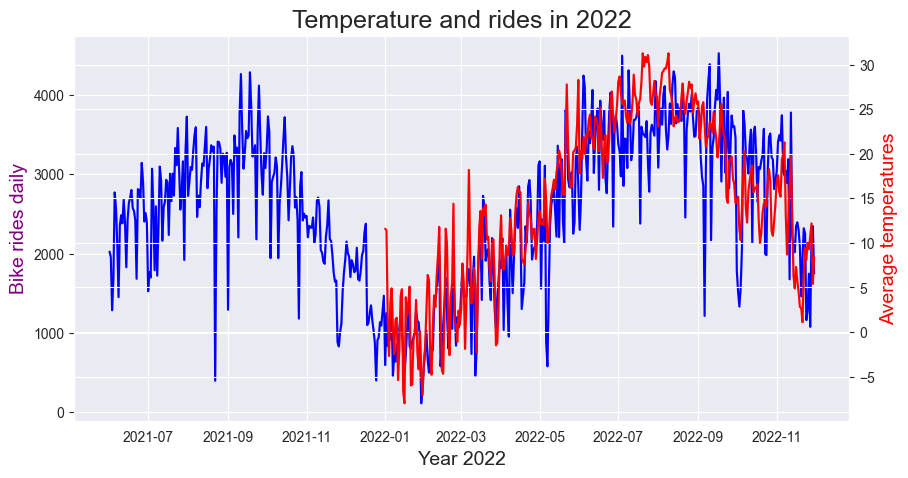

In [23]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "purple", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and rides in 2022', fontsize = 18)
plt.show()

In [25]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily               int64
merge_flag                  category
dtype: object

In [26]:
df['member_casual']

0          member
1          member
2          casual
3          member
4          member
            ...  
1388893    member
1388894    member
1388895    member
1388896    member
1388897    member
Name: member_casual, Length: 1388898, dtype: object

In [27]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

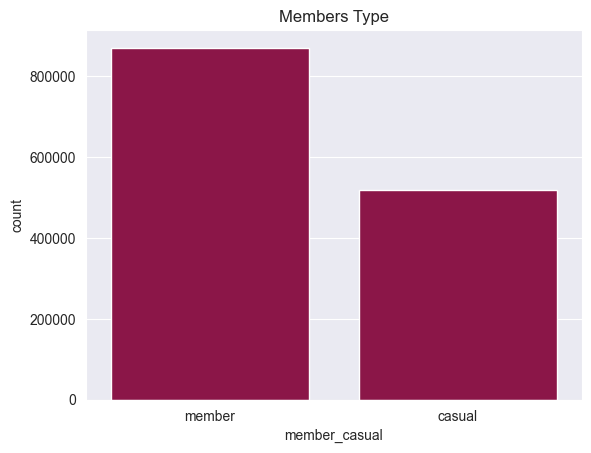

In [28]:
sns.countplot(data = df, x = 'member_casual'), 
plt.title("Members Type")
plt.show()

### Box plot

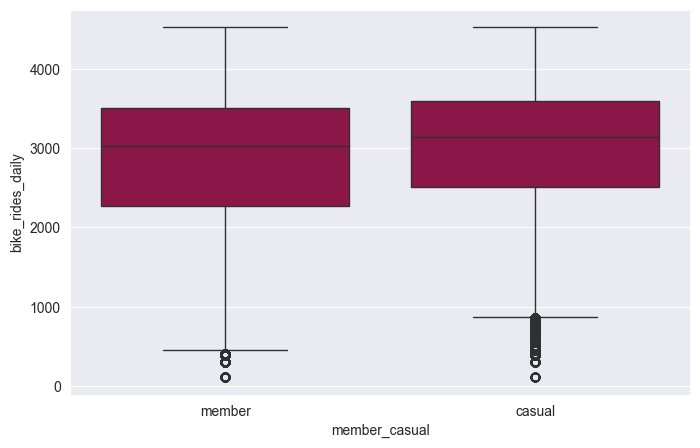

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'member_casual', y = 'bike_rides_daily', data = df)
plt.show()

#### Higher Frequency for Members: The boxplot clearly shows that members tend to have higher daily ride frequencies compared to casual riders. The median and upper quartile of the member distribution are significantly higher than those of the casual rider distribution.
#### Presence of Outliers: The longer whiskers and individual data points beyond the whiskers in the casual rider distribution indicate the presence of outliers. These outliers might represent occasional heavy users or one-off events that skew the distribution.


### Facet Grids

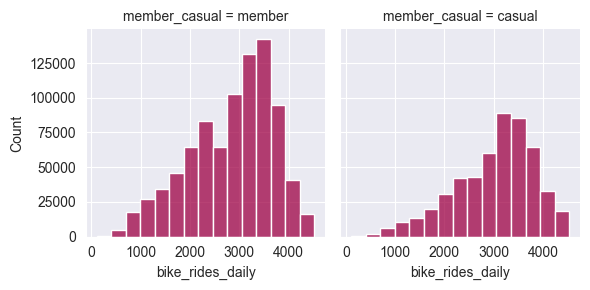

In [33]:
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "bike_rides_daily", bins = 15)
plt.show()

#### A facet grid plot is a fantastic way to visualize and compare different groups within your data. By breaking down the data by user type (member vs. casual), you can clearly see that members tend to take significantly more bike rides than casual riders.